In [1]:
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.preprocessing import scale
from sklearn.cluster import KMeans
from sklearn.metrics import confusion_matrix
from sklearn.decomposition import PCA

Se normalizan los valores numéricos para mejor funcionamiento del algoritmo kmeans

In [2]:
cars = pd.read_csv('../datasets/vehicles_clean.csv')

cars['price'] = (cars['price'] - min(cars['price'])) / (max(cars['price']) - min(cars['price']))
cars['year'] = (cars['year'] - min(cars['year'])) / (max(cars['year']) - min(cars['year']))
cars['odometer'] = (cars['odometer'] - min(cars['odometer'])) / (max(cars['odometer']) - min(cars['odometer']))
cars['lat'] = (cars['lat'] - min(cars['lat'])) / (max(cars['lat']) - min(cars['lat']))
cars['long'] = (cars['long'] - min(cars['long'])) / (max(cars['long']) - min(cars['long']))

Variables categóricas a dummies

In [3]:
feature_cols = ['year',
               'manufacturer',
               'condition',
               'cylinders',
               'fuel',
               'odometer',
               'title_status',
               'transmission',
               'drive',
               'size',
               'type',
               'paint_color',
               'state',
               'region',
               'lat',
               'long',
               'price']

cars = cars[feature_cols]
cars = pd.get_dummies(data=cars, columns = ['manufacturer',
                                     'condition',
                                     'cylinders',
                                     'fuel',
                                     'title_status',
                                     'transmission',
                                     'drive',
                                     'size',
                                     'type',
                                     'paint_color',
                                     'state',
                                     'region'])



Análisis de componentes principales para reducir la dimensionalidad y poder representar mejor el clustering obtenido.

In [17]:
pca = PCA(n_components=2)
principalComponents = pca.fit_transform(cars)
# Porcentaje de explicación de cada variable
pca.explained_variance_ratio_

array([0.10929135, 0.05898934])

In [18]:
import numpy as np
from scipy.spatial.distance import cdist

Método del codo para obtener el número de clusters óptimo

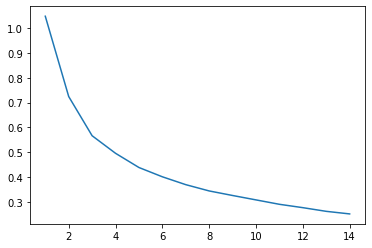

In [19]:
# Rango de valores de K que se va a probar
K = range(1,15)
distortions = []
#
for k in K:
    kmeansModel = KMeans(n_clusters = k)
    kmeansModel.fit(principalComponents)
    distortions.append(sum(np.min(cdist(principalComponents,
                                        kmeansModel.cluster_centers_, 
                                        'euclidean'), 
                                  axis=1)
                          ) / principalComponents.shape[0])
    
plt.plot(range(1, 15), distortions)

Modelo kmeans y representación gráfica del resultado. Muchos atributos transformados a dos únicas variables: poca interpretabilidad.

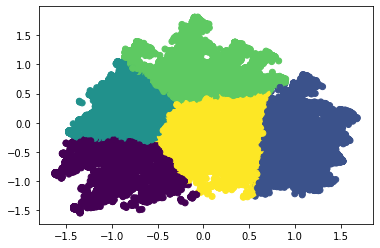

In [21]:
# Kmeans
km = KMeans(n_clusters = 5, 
            random_state = 20)
km.fit(principalComponents)

# En cada eje una componente y el color en función de las etiquetas obtenidas mediante kmeans
plt.scatter(principalComponents[:,0], principalComponents[:,1], c = km.labels_)